In [1]:
import numpy as np
import pandas as pd

In [31]:
# Modelling
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split,GridSearchCV
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from subprocess import call
import plotly.graph_objects as go

In [3]:
# Read dataset
df = pd.read_csv("../data/titanic/preprocessed.csv") # changed index_col
df.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [6]:
features = ["Sex","Pclass","SibSp","Parch"]
train_df, val_df = train_test_split(df,test_size=0.2)
train_X, train_y = train_df[features], train_df.Survived
test_X, test_y = val_df[features], val_df.Survived

In [20]:
grid_param = { 
    'n_estimators': [200, 500],
    'max_depth' : [2, 5, 10],
}
model = RandomForestClassifier(random_state=42)
grid_mse = GridSearchCV(estimator=model, param_grid=grid_param, cv=5, verbose=1, scoring="neg_mean_squared_error")
grid_mse.fit(train_X, train_y)
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found:  {'max_depth': 2, 'n_estimators': 200}
Lowest RMSE found:  0.4370666797830491


In [21]:
model = RandomForestClassifier(n_estimators=200, max_depth=2, random_state=42)
model.fit(train_X, train_y)

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=42)

In [22]:
# Make predictions for the test set
pred_test_y = model.predict(test_X)
pred_train_y = model.predict(train_X)

In [26]:
# View accuracy score
accuracy_score(test_y, pred_test_y)

0.7653631284916201

In [27]:
accuracy_score(train_y, pred_train_y)

0.8089887640449438

In [35]:
importances = model.feature_importances_
importances_std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(x=features, y=importances, error_y=dict(type='data', array=importances_std, visible=True)))
fig.update_layout(title=f"Feature importances using MDI", yaxis_title='Mean decrease in impurity')
fig.show()

In [36]:
# View confusion matrix for test data and predictions
cm = confusion_matrix(test_y, pred_test_y)

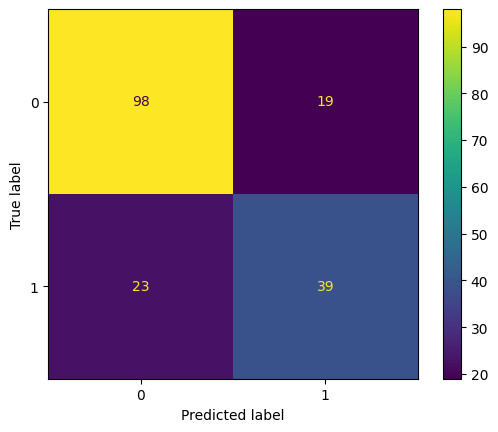

In [37]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [38]:
# View the classification report for test data and predictions
print(classification_report(test_y, pred_test_y))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       117
           1       0.67      0.63      0.65        62

    accuracy                           0.77       179
   macro avg       0.74      0.73      0.74       179
weighted avg       0.76      0.77      0.76       179



In [15]:
"""
True Positives (TP) — The instances where the model correctly predicts the positive class (Spam email) as positive.
False Positives (FP) - The instances where the model incorrectly predicts the negative class (Not a spam email) as positive.
True Negatives (TN) - The instances where the model correctly predicts the negative class as negative.
False Negatives (FN) - The instances where the model incorrectly predicts the positive class as negative

precision: TP / ( TP + FP )
Recall: TP / ( TP + FN )


https://medium.com/@chanakapinfo/classification-report-explained-precision-recall-accuracy-macro-average-and-weighted-average-8cd358ee2f8a
"""

'\nTrue Positives (TP) — The instances where the model correctly predicts the positive class (Spam email) as positive.\nFalse Positives (FP) - The instances where the model incorrectly predicts the negative class (Not a spam email) as positive.\nTrue Negatives (TN) - The instances where the model correctly predicts the negative class as negative.\nFalse Negatives (FN) - The instances where the model incorrectly predicts the positive class as negative\n\nprecision: TP / ( TP + FP )\nRecall: TP / ( TP + FN )\n\n\nhttps://medium.com/@chanakapinfo/classification-report-explained-precision-recall-accuracy-macro-average-and-weighted-average-8cd358ee2f8a\n'